In [288]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
from sklearn import preprocessing

# KNN Classification

In [289]:
df=pd.read_csv("teleCust1000t.csv")

In [290]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [291]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [292]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

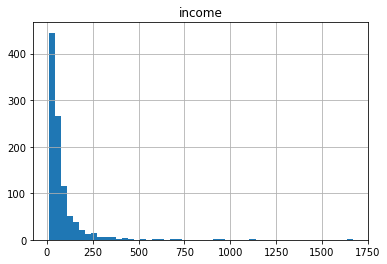

In [293]:
df.hist(column='income',bins=50)

In [294]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [295]:
X=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']]
X[0:5]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [296]:
y=df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

# Data Normalisation

In [297]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 4)

scaler = preprocessing.StandardScaler().fit(X_train) #obtain the scaler from trianing data
X_train=scaler.transform(X_train.astype(float))
X_test=scaler.transform(X_test.astype(float))



print('train set:',X_train.shape,'test set:',X_test.shape)
print('train label:',y_train.shape,'test label:',y_test.shape)

train set: (800, 11) test set: (200, 11)
train label: (800,) test label: (200,)


In [298]:
from sklearn.neighbors import KNeighborsClassifier 

In [299]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

In [300]:
yhat = neigh.predict(X_test)
yhat[0:5]
#y[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [301]:
from sklearn import metrics
print ('Train set Accuracy:', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print ('Test set Accuracy:', metrics.accuracy_score(y_test, neigh.predict(X_test)))

Train set Accuracy: 0.5475
Test set Accuracy: 0.32


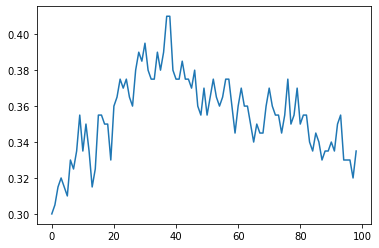

In [302]:
# loop for finding the best K

Ks=100
yhat=np.zeros([Ks,len(y_test)])
scores=np.zeros([Ks-1,1])

for k in range (1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    scores[k-1]=metrics.accuracy_score(y_test, neigh.predict(X_test))
    
plt.plot(scores)

# Decision tree classification

In [303]:
from sklearn.tree import DecisionTreeClassifier
mydata=pd.read_csv("drug200.csv")
mydata.describe()
mydata[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [304]:
mydata['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [305]:
feats=mydata.columns
feats

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [306]:
X=mydata[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y=mydata[['Drug']].values
X

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368],
       [47, 'F', 'LOW', 'HIGH', 11.767],
       [34, 'F', 'HIGH', 'NORMAL', 19.199],
       [43, 'M', 'LOW', 'HIGH', 15.376],
       [74, 'F', 'LOW', 'HIGH', 20.942],
       [50, 'F', 'NORMAL', 'HIGH', 12.703],
       [16, 'F', 'HIGH', 'NORMAL', 15.516],
       [69, 'M', 'LOW', 'NORMAL', 11.455],
       [43, 'M', 'HIGH', 'HIGH', 13.972],
       [23, 'M', 'LOW', 'HIGH', 7.298],
       [32, 'F', 'HIGH', 'NORMAL', 25.974],
       [57, 'M', 'LOW', 'NORMAL', 19.128],
       [63, 'M', 'NORMAL', 'HIGH', 25.917],
       [47, 'M', 'LOW', 'NORMAL', 30.568],
       [48, 'F', 'LOW',

In [307]:
le_sex=preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1]=le_sex.transform(X[:,1])

le_BP=preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
X[:,2]=le_BP.transform(X[:,2])

le_Chol=preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL','HIGH'])
X[:,3]=le_Chol.transform(X[:,3])

In [308]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 4)

In [309]:
drugTree=DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [310]:
predTree=drugTree.predict(X_test)
predTree

array(['drugY', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX', 'drugY',
       'drugY', 'drugY', 'drugA', 'drugA', 'drugX', 'drugA', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugA', 'drugC', 'drugX',
       'drugC', 'drugA', 'drugX', 'drugC', 'drugB', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugB', 'drugC', 'drugX', 'drugX', 'drugY',
       'drugY', 'drugA', 'drugA', 'drugX', 'drugY'], dtype=object)

In [312]:
print ('Train set Accuracy:', metrics.accuracy_score(y_test, predTree))

Train set Accuracy: 0.95


[Text(209.25, 195.696, 'X[4] <= 14.627\nentropy = 1.923\nsamples = 160\nvalue = [17, 13, 11, 43, 76]'),
 Text(167.4, 152.208, 'X[2] <= 0.5\nentropy = 1.762\nsamples = 84\nvalue = [17, 13, 11, 43, 0]'),
 Text(83.7, 108.72, 'X[0] <= 52.5\nentropy = 0.987\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(41.85, 65.232, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(125.55000000000001, 65.232, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 1.5\nentropy = 0.729\nsamples = 54\nvalue = [0, 0, 11, 43, 0]'),
 Text(209.25, 65.232, 'X[3] <= 0.5\nentropy = 0.99\nsamples = 25\nvalue = [0, 0, 11, 14, 0]'),
 Text(167.4, 21.744, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(251.10000000000002, 21.744, 'entropy = 0.0\nsamples = 14\nvalue = [0, 0, 0, 14, 0]'),
 Text(292.95, 65.232, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 0, 29, 0]'),
 Text(251.10000000000002, 152.208, 'entropy = 0.0\nsamples = 76\nvalue = [0, 0

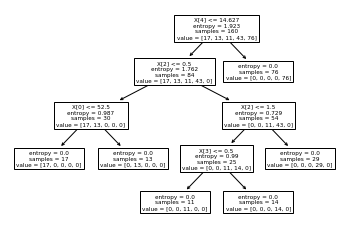

In [330]:
tree.plot_tree(drugTree)

# Random Forrest Classifier

In [316]:
from sklearn.ensemble import RandomForestClassifier

In [317]:
# from sklearn.datasets import make_classification # if you need to generate random numbers
#X, y = make_classification(n_samples=1000, n_features=4,
#...                            n_informative=2, n_redundant=0,
#...                            random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 4)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

<ipython-input-317-53d668ab28f8>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [318]:
print ('Train set Accuracy:', metrics.accuracy_score(y_train, clf.predict(X_train)))

Train set Accuracy: 0.93125


In [319]:
print ('Test set Accuracy:', metrics.accuracy_score(y_test, clf.predict(X_test)))

Test set Accuracy: 0.8


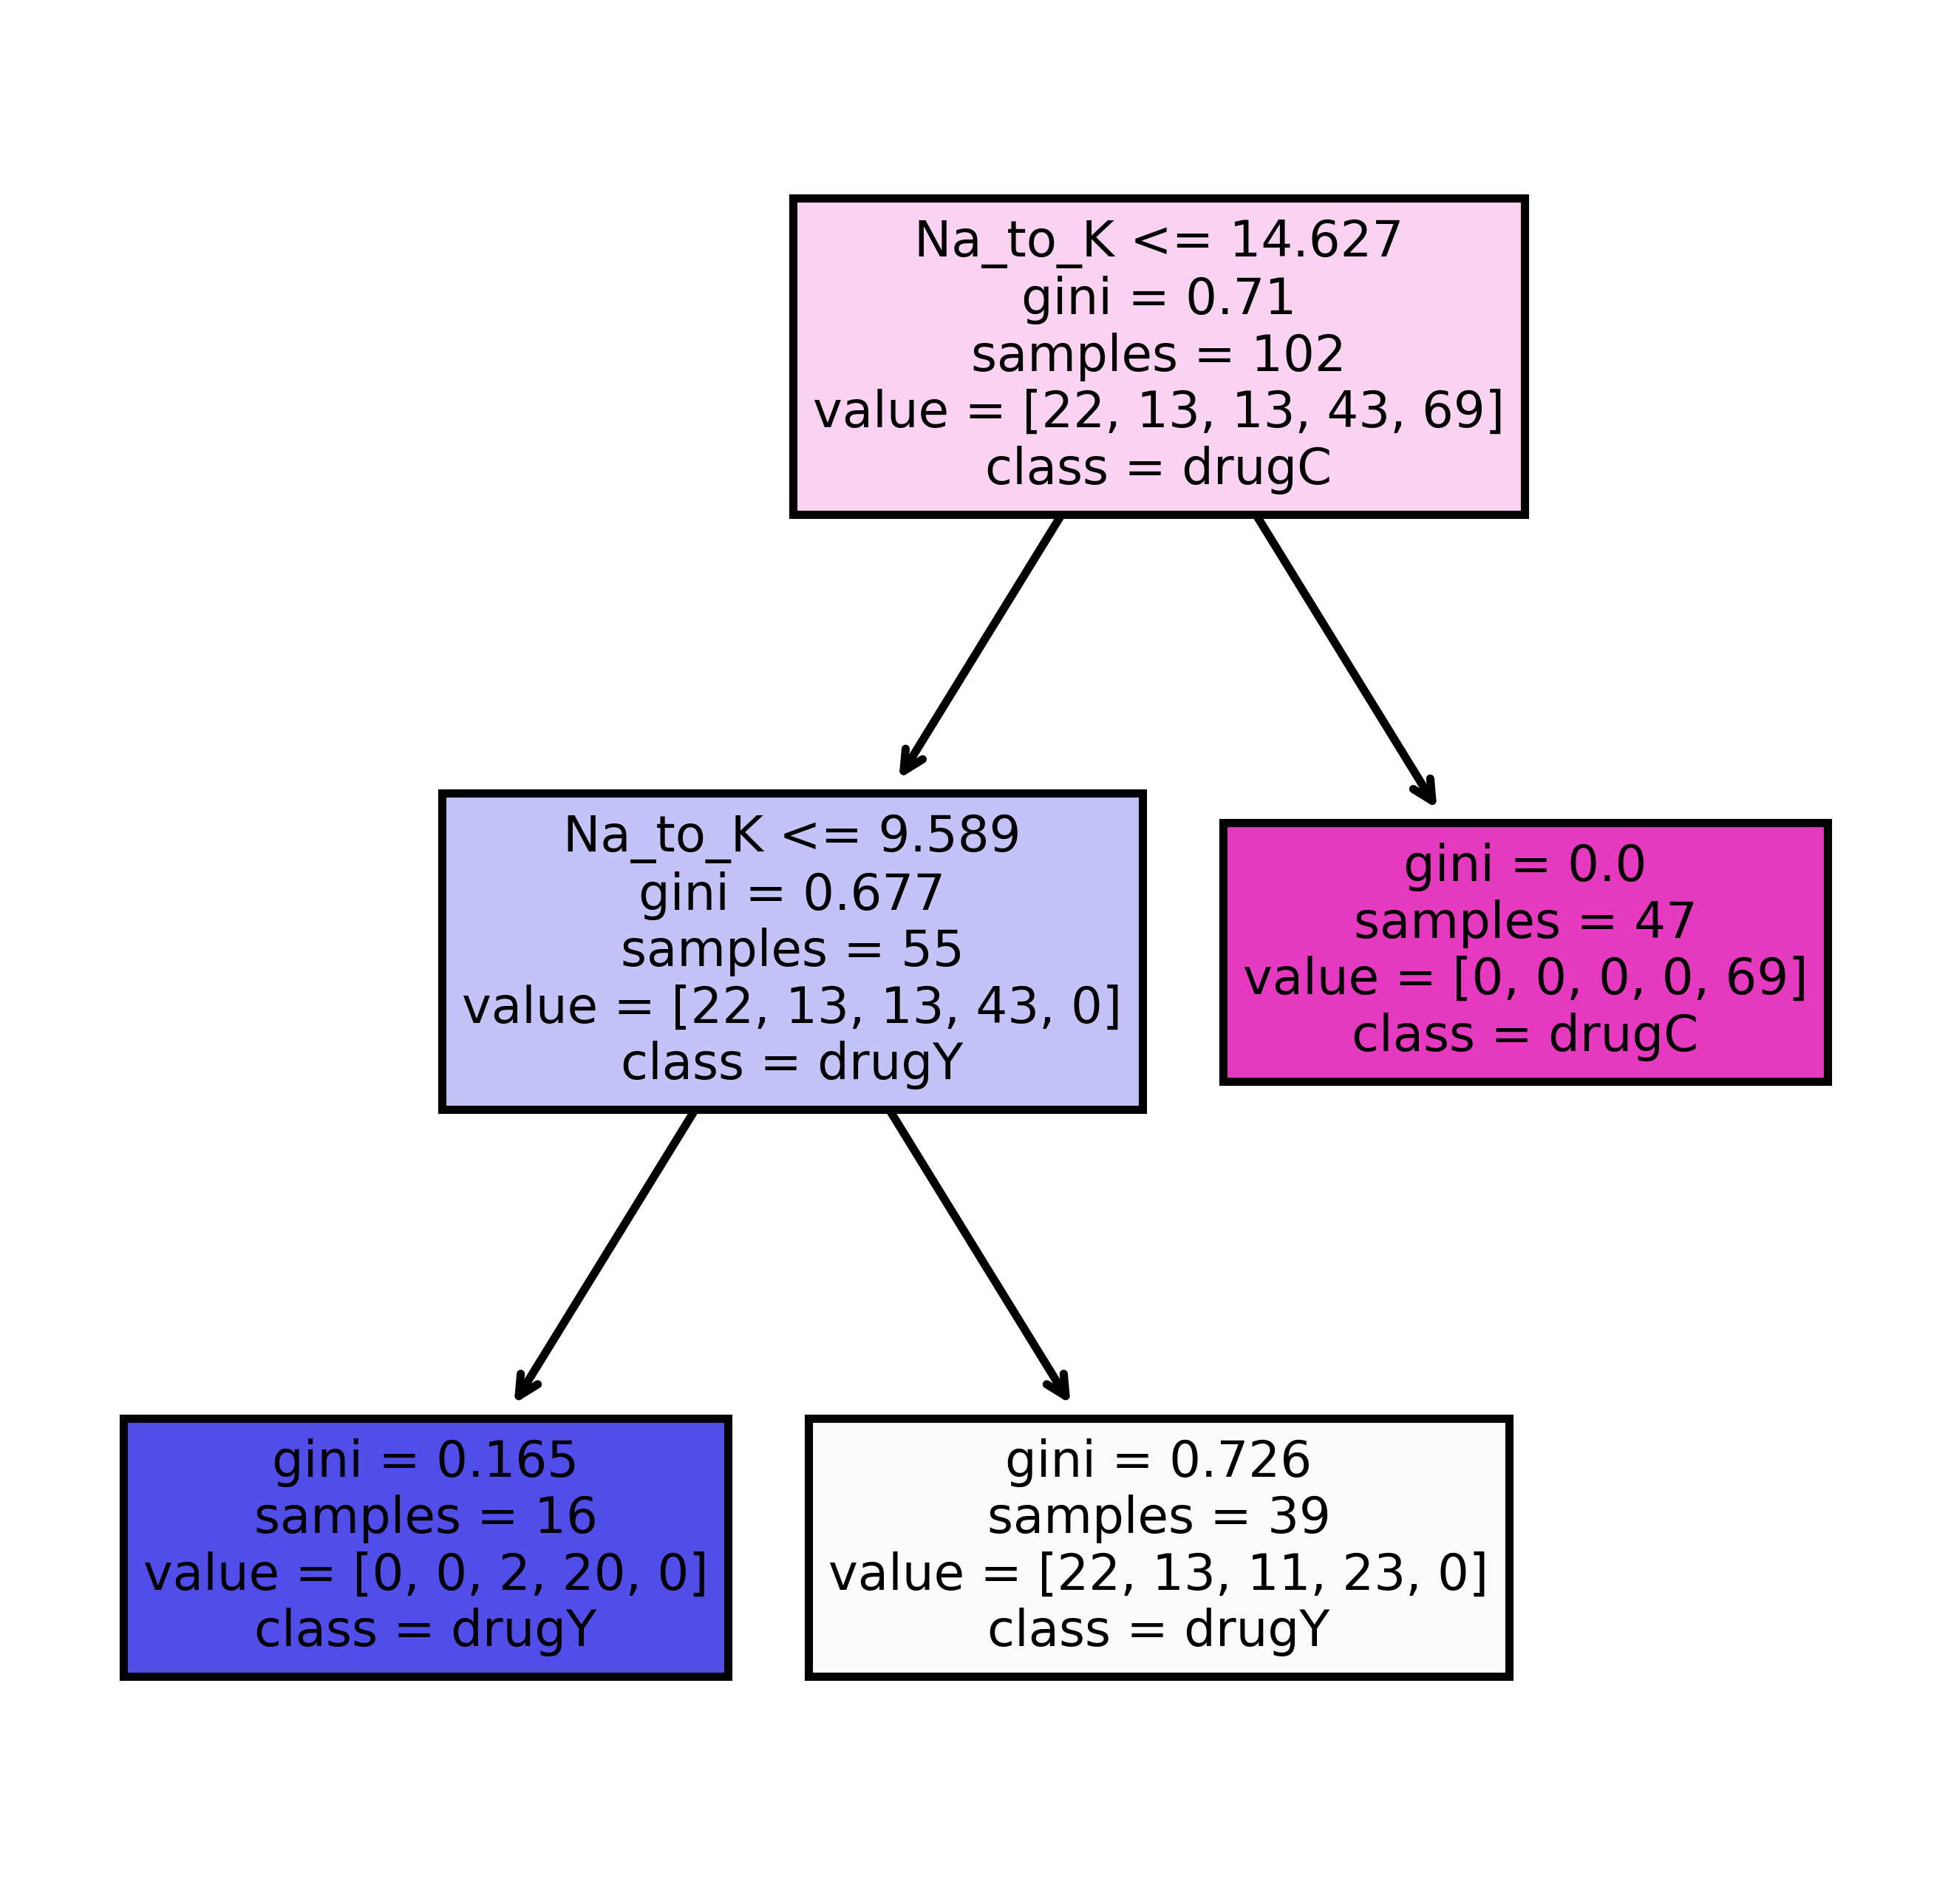

In [346]:
fn=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
cn=y_test.reshape(-1)
tree_index=99 # the tree you want to plot

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[tree_index],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

# Logistic regression classification

In [116]:
churn_df=pd.read_csv("ChurnData.csv")

In [117]:
churn_df['churn']=churn_df['churn'].astype('int')

In [118]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0


In [135]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [137]:
X=np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ','equip']])
X

array([[11., 33.,  7., ...,  5.,  5.,  0.],
       [33., 33., 12., ...,  2.,  0.,  0.],
       [23., 30.,  9., ...,  1.,  2.,  0.],
       ...,
       [ 6., 32., 10., ...,  1., 10.,  0.],
       [24., 30.,  0., ...,  4.,  5.,  0.],
       [61., 50., 16., ...,  2., 22.,  1.]])

In [139]:
y=np.asarray(churn_df['churn'])
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0])

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 4)
print('trainnig set: ', X_train.shape , y_train.shape )

trainnig set:  (160, 7) (160,)


In [141]:
scaler = preprocessing.StandardScaler().fit(X_train) #obtain the scaler from trianing data
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [142]:
X_train.shape

(160, 7)

In [143]:
y_train.shape
y_train

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0])

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [145]:
LR = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train,y_train)

In [146]:
y_hat=LR.predict(X_test)
yhat_prob=LR.predict_proba(X_test)

In [147]:
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [152]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,y_hat,pos_label = 0)

0.7058823529411765

In [154]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_hat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


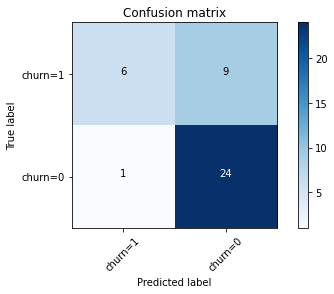

In [156]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [158]:
print (classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



In [160]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6025205266771515

# SVM Classifier

In [162]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [164]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


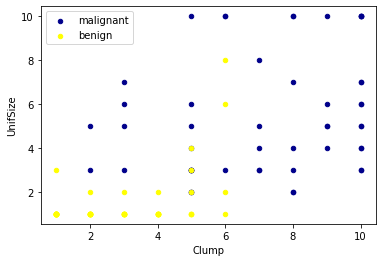

In [165]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [178]:
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int32
dtype: object

In [167]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [168]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [169]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

In [170]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [171]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [172]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

In [173]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [174]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


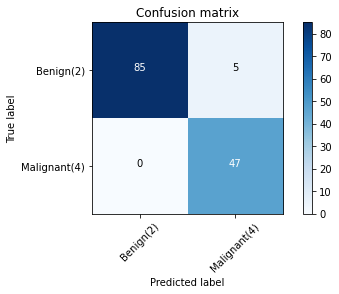

In [175]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [176]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9639038982104676

In [177]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=2)

0.9444444444444444